In [1]:
pip install --force-reinstall typing-extensions==4.5.0

  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.5.0
    Uninstalling typing-extensions-4.5.0:
      Successfully uninstalled typing-extensions-4.5.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from spacy.lang.en import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

In [3]:
data=pd.read_csv(r"C:\Users\Admin\Desktop\news.csv")

In [4]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [58]:
data.shape

(6335, 4)

In [5]:
df=data.drop('Unnamed: 0',axis=1)

In [6]:
data.isna().sum() # Checking for nan Values

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

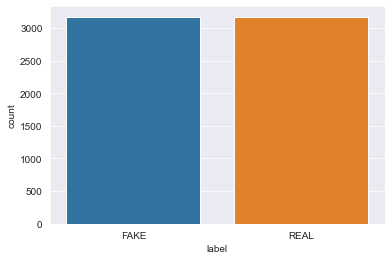

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.set_style("darkgrid")
sns.countplot(x=data.label, data=data)
plt.show()

In [8]:
df["text"] = df.title + " " + df.text
df=df.drop(['title'],axis=1)
df.head()

,text,label
0,You Can Smell Hillary’s Fear Daniel Greenfield...,FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE
2,Kerry to go to Paris in gesture of sympathy U....,REAL
3,Bernie supporters on Twitter erupt in anger ag...,FAKE
4,The Battle of New York: Why This Primary Matte...,REAL


In [9]:
df["lower"] = df["text"].map(lambda x: x.lower())

In [10]:
import re
def url(text):
    url_check = "http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
    clean = re.sub(url_check, "", text)
    return clean

def num_repl(text):
    num_check = "([0-9,]*)"
    clean = re.sub(num_check, "", text).strip()
    return clean

def remove_stop(text):
    word_list = text.split()
    stopword_dict = Counter(STOP_WORDS)
    newlist = [word.strip() for word in word_list if word not in stopword_dict]
    sentence = " ".join(newlist)
    
    sentence = url(sentence)
    sentence = num_repl(sentence)
    from string import punctuation
    punctuations = '''@#!?+&*[]%.:/-();$=><|{}^'`\\'''
    punctuations = set(punctuation)
    for p in punctuations:
        sentence = sentence.replace(p, " ")
    sentence.strip()
    
    return sentence

In [11]:
df["clean_text"] = df.text.apply(remove_stop)
df["clean_text"] = df.clean_text.apply(lambda x: " ".join([w for w in x.split() if (len(w)>2)]))
df["clean_text"] = df.clean_text.apply(lambda x: " ".join([w for w in x.split() if (len(set(w))>2)]))

In [12]:
df.head()

,text,label,lower,clean_text
0,You Can Smell Hillary’s Fear Daniel Greenfield...,FAKE,you can smell hillary’s fear daniel greenfield...,You Can Smell Hillary’s Fear Daniel Greenfield...
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE,watch the exact moment paul ryan committed pol...,Watch The Exact Moment Paul Ryan Committed Pol...
2,Kerry to go to Paris in gesture of sympathy U....,REAL,kerry to go to paris in gesture of sympathy u....,Kerry Paris gesture sympathy Secretary State J...
3,Bernie supporters on Twitter erupt in anger ag...,FAKE,bernie supporters on twitter erupt in anger ag...,Bernie supporters Twitter erupt anger DNC trie...
4,The Battle of New York: Why This Primary Matte...,REAL,the battle of new york: why this primary matte...,The Battle New York Why This Primary Matters p...


In [13]:
import nltk
import string
import re
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords,wordnet
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))
df['stop'] = df['clean_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['punc'] = df['stop'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,text,label,lower,clean_text,stop,punc
0,You Can Smell Hillary’s Fear Daniel Greenfield...,FAKE,you can smell hillary’s fear daniel greenfield...,You Can Smell Hillary’s Fear Daniel Greenfield...,You Can Smell Hillarys Fear Daniel Greenfield ...,You Can Smell Hillarys Fear Daniel Greenfield ...
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE,watch the exact moment paul ryan committed pol...,Watch The Exact Moment Paul Ryan Committed Pol...,Watch The Exact Moment Paul Ryan Committed Pol...,Watch The Exact Moment Paul Ryan Committed Pol...
2,Kerry to go to Paris in gesture of sympathy U....,REAL,kerry to go to paris in gesture of sympathy u....,Kerry Paris gesture sympathy Secretary State J...,Kerry Paris gesture sympathy Secretary State J...,Kerry Paris gesture sympathy Secretary State J...
3,Bernie supporters on Twitter erupt in anger ag...,FAKE,bernie supporters on twitter erupt in anger ag...,Bernie supporters Twitter erupt anger DNC trie...,Bernie supporters Twitter erupt anger DNC trie...,Bernie supporters Twitter erupt anger DNC trie...
4,The Battle of New York: Why This Primary Matte...,REAL,the battle of new york: why this primary matte...,The Battle New York Why This Primary Matters p...,The Battle New York Why This Primary Matters p...,The Battle New York Why This Primary Matters p...


In [14]:
nltk.download('punkt')
df['tokenized'] = df['punc'].apply(word_tokenize)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,label,lower,clean_text,stop,punc,tokenized
0,You Can Smell Hillary’s Fear Daniel Greenfield...,FAKE,you can smell hillary’s fear daniel greenfield...,You Can Smell Hillary’s Fear Daniel Greenfield...,You Can Smell Hillarys Fear Daniel Greenfield ...,You Can Smell Hillarys Fear Daniel Greenfield ...,"[You, Can, Smell, Hillarys, Fear, Daniel, Gree..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE,watch the exact moment paul ryan committed pol...,Watch The Exact Moment Paul Ryan Committed Pol...,Watch The Exact Moment Paul Ryan Committed Pol...,Watch The Exact Moment Paul Ryan Committed Pol...,"[Watch, The, Exact, Moment, Paul, Ryan, Commit..."
2,Kerry to go to Paris in gesture of sympathy U....,REAL,kerry to go to paris in gesture of sympathy u....,Kerry Paris gesture sympathy Secretary State J...,Kerry Paris gesture sympathy Secretary State J...,Kerry Paris gesture sympathy Secretary State J...,"[Kerry, Paris, gesture, sympathy, Secretary, S..."
3,Bernie supporters on Twitter erupt in anger ag...,FAKE,bernie supporters on twitter erupt in anger ag...,Bernie supporters Twitter erupt anger DNC trie...,Bernie supporters Twitter erupt anger DNC trie...,Bernie supporters Twitter erupt anger DNC trie...,"[Bernie, supporters, Twitter, erupt, anger, DN..."
4,The Battle of New York: Why This Primary Matte...,REAL,the battle of new york: why this primary matte...,The Battle New York Why This Primary Matters p...,The Battle New York Why This Primary Matters p...,The Battle New York Why This Primary Matters p...,"[The, Battle, New, York, Why, This, Primary, M..."


In [15]:
nltk.download('wordnet')
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
# df['lemmatized'] =df['tokenized'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)])) 
# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
df['lemmatized']= df.punc.apply(lemmatize_text)
df.sample(n=7)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,label,lower,clean_text,stop,punc,tokenized,lemmatized
3900,What advantages does Scott Walker offer? Every...,REAL,what advantages does scott walker offer? every...,What advantages Scott Walker offer Every GOP p...,What advantages Scott Walker offer Every GOP p...,What advantages Scott Walker offer Every GOP p...,"[What, advantages, Scott, Walker, offer, Every...","[What, advantage, Scott, Walker, offer, Every,..."
3550,Hillary Clinton's Second Amendment Accepting t...,REAL,hillary clinton's second amendment accepting t...,Hillary Clinton Second Amendment Accepting Nat...,Hillary Clinton Second Amendment Accepting Nat...,Hillary Clinton Second Amendment Accepting Nat...,"[Hillary, Clinton, Second, Amendment, Acceptin...","[Hillary, Clinton, Second, Amendment, Acceptin..."
4687,Lady Gaga Protests Donald Trump Outside of Tru...,FAKE,lady gaga protests donald trump outside of tru...,Lady Gaga Protests Donald Trump Outside Trump ...,Lady Gaga Protests Donald Trump Outside Trump ...,Lady Gaga Protests Donald Trump Outside Trump ...,"[Lady, Gaga, Protests, Donald, Trump, Outside,...","[Lady, Gaga, Protests, Donald, Trump, Outside,..."
1667,"Cable news is in trouble, and it’s more about ...",REAL,"cable news is in trouble, and it’s more about ...",Cable news trouble it’s news cable Cable news ...,Cable news trouble its news cable Cable news t...,Cable news trouble news cable Cable news troub...,"[Cable, news, trouble, news, cable, Cable, new...","[Cable, news, trouble, news, cable, Cable, new..."
5406,A Republican Representative Just Called For Hi...,FAKE,a republican representative just called for hi...,Republican Representative Just Called For Hill...,Republican Representative Just Called For Hill...,Republican Representative Just Called For Hill...,"[Republican, Representative, Just, Called, For...","[Republican, Representative, Just, Called, For..."
202,"Trump slams 'corrupt' media, as more women mak...",REAL,"trump slams 'corrupt' media, as more women mak...",Trump slams corrupt media women sexual assault...,Trump slams corrupt media women sexual assault...,Trump slams corrupt media women sexual assault...,"[Trump, slams, corrupt, media, women, sexual, ...","[Trump, slam, corrupt, medium, woman, sexual, ..."
5623,US Military Notifies Russia Of “Sustained Aler...,FAKE,us military notifies russia of “sustained aler...,Military Notifies Russia “Sustained Alert Stat...,Military Notifies Russia Sustained Alert Statu...,Military Notifies Russia Sustained Alert Statu...,"[Military, Notifies, Russia, Sustained, Alert,...","[Military, Notifies, Russia, Sustained, Alert,..."


In [16]:
df["lemmatized"] = df.lemmatized.apply(lambda x: " ".join([w for w in x]))

In [17]:
#train-test split
from sklearn.model_selection import train_test_split

X=df['lemmatized']
y=df['label'].map({'FAKE':0,'REAL':1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

##### COUNT VECTORIZER METHOD

In [18]:
# from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
cv.fit(X_train)

CountVectorizer(stop_words='english')

In [19]:
X_traint = cv.transform(X_train)
X_testt = cv.transform(X_test)

In [20]:
print(X_traint.shape, X_testt.shape)

(4434, 55598) (1901, 55598)


In [38]:
model_xgb = XGBClassifier()#, n_estimators=100, max_depth=6, reg_alpha=0.1)

In [39]:
model_xgb.fit(X_traint, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [41]:
train_pred=model_xgb.predict(X_traint)

In [42]:
model_xgb.score(y_train,train_pred)

0.4939106901217862

In [52]:
rf=RandomForestClassifier(max_depth=6)
rf.fit(X_traint, y_train)

RandomForestClassifier(max_depth=6)

In [53]:
train_pred1=rf.predict(X_traint)

In [54]:
from sklearn.metrics import accuracy_score ,roc_auc_score,f1_score
print(accuracy_score(train_pred1,y_train))
print(roc_auc_score(train_pred1,y_train))
print(f1_score(train_pred1,y_train))

0.8561118628777628
0.8646024229177758
0.8467083133109082


In [55]:
test_pred1=rf.predict(X_testt)

In [57]:
print(accuracy_score(test_pred1,y_test))
print(roc_auc_score(test_pred1,y_test))
print(f1_score(test_pred1,y_test))

0.8243029984218833
0.8259164940952595
0.8106575963718822
